In [ ]:
import wandb
import pandas as pd

# wandbにログイン済みか、APIキーの設定が必要
api = wandb.Api()

entity = "kazuyasakakibara"
project = "FoodBank2025"
run_id = "kdxgpyz3"

# 対象のプロジェクトとrun_idを指定してRunオブジェクトを取得
run = api.run(f"{entity}/{project}/{run_id}")

table_name = "w_final_table"

for art in run.logged_artifacts():
    table = art.get("w_final_table")
    if table:
        table_df_with_timeout = table.get_dataframe()
        print(table)
        print(table_df_with_timeout)

tables = []

# # scan_historyで全ログをイテレート
# for row in run.scan_history(keys=["w_final_table"]):
#     print(row)
#     print(row.get("step"))
#     table_ref = row.get("w_final_table")
#     print(row)
#     artifact_path = table_ref["artifact_path"]
#     print(artifact_path)
#     artifact = api.artifact(artifact_path)
#     print(artifact)
#     table_obj = artifact.get(table_ref["name"])
#     print(table_obj)
#     df = table_obj.get_dataframe()
#     tables.append(df)

# print(tables)



Runs after 2025-10-05: 56
Processing run_id: kdxgpyz3
Processing run_id: 5hviojii
Processing run_id: qs0om2h6
Processing run_id: w8yilr6y
Processing run_id: j1d0zlnj
Processing run_id: ad8dq36u
Processing run_id: kq813hut
Processing run_id: 76l9muz5
Processing run_id: zipzcoxx
Processing run_id: y0xkn82k
Processing run_id: y4k3m792
Processing run_id: jzfagqc3
Processing run_id: db8j14ow
Processing run_id: mzqzazct
Processing run_id: caoyxd5y
Processing run_id: kftpig2y
Processing run_id: 5g1hmces
Processing run_id: arjig1oz
Processing run_id: lnqjjr5h
Processing run_id: freeec3v
Processing run_id: crvcls1t
Processing run_id: wox7u2tz
Processing run_id: icyf6uc1
Processing run_id: lka3pqsi
Processing run_id: erht63gl
Processing run_id: 5wr21euw
Processing run_id: vkwcxwp7
Processing run_id: hvrro16f
Processing run_id: pgp6hcmv
Processing run_id: wovzkb5h
With timeout:
w1 shape: (75925, 320)
b1 shape: (75925, 32)
w_final shape: (75925, 32)
v shape: (75925, 1)

Without timeout:
w1 shape: 

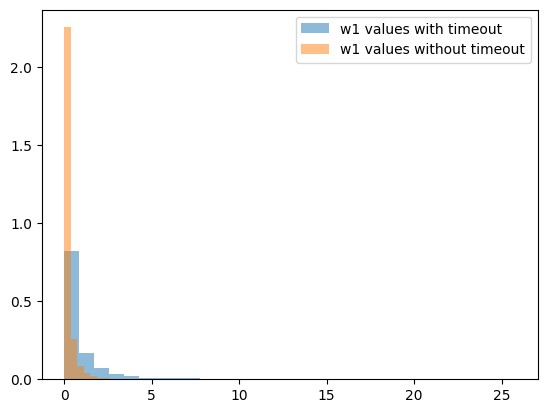

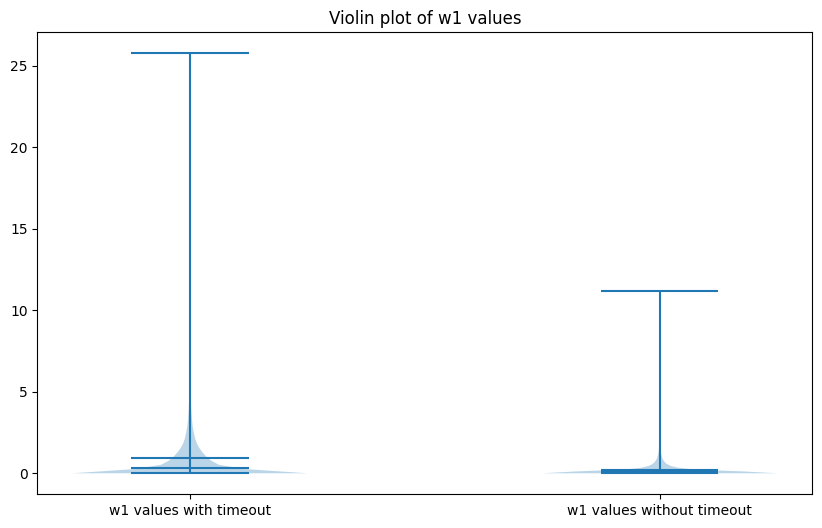

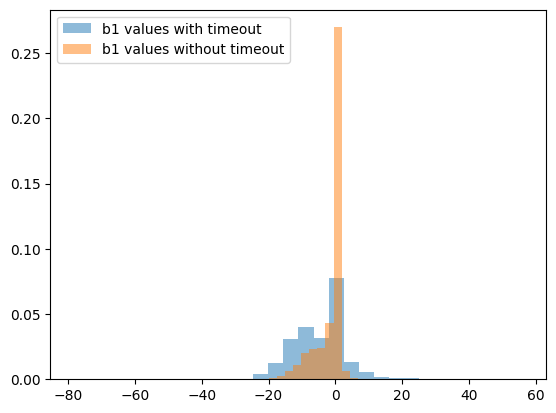

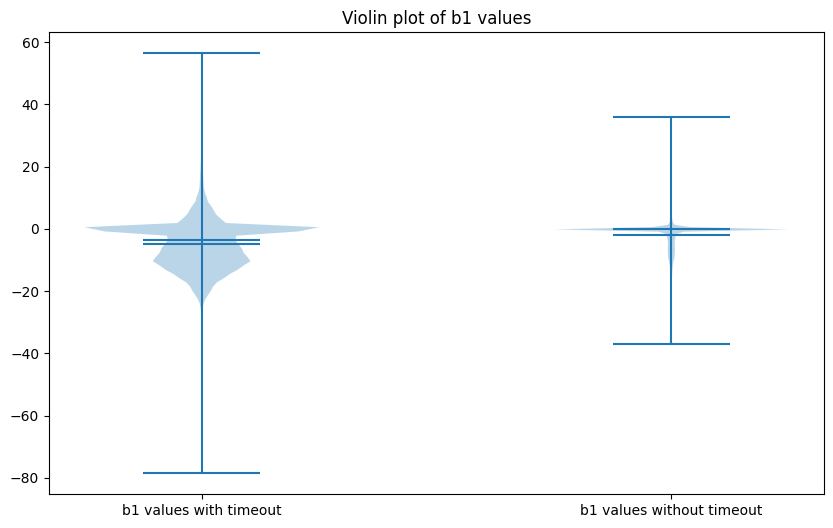

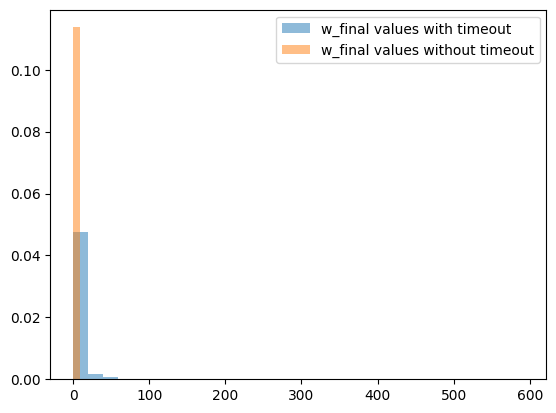

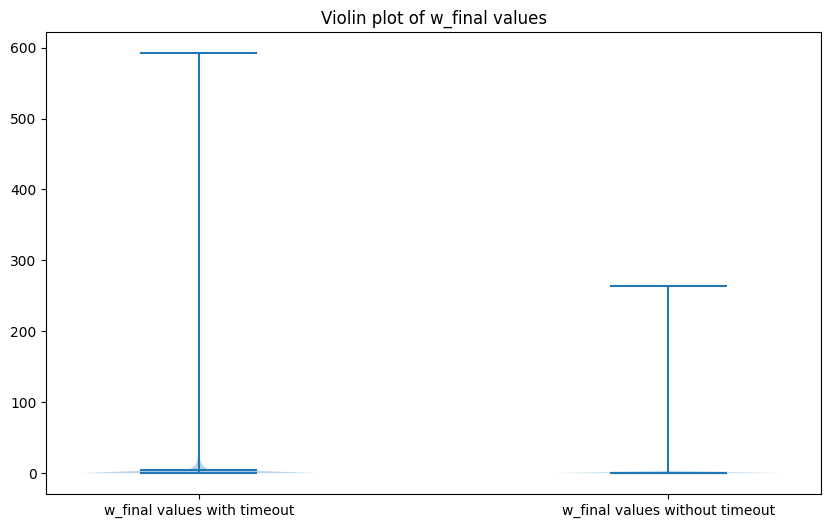

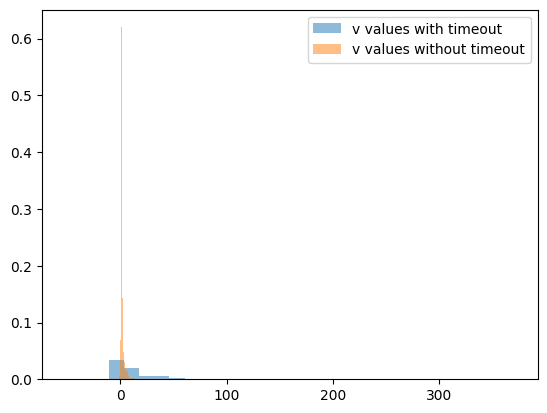

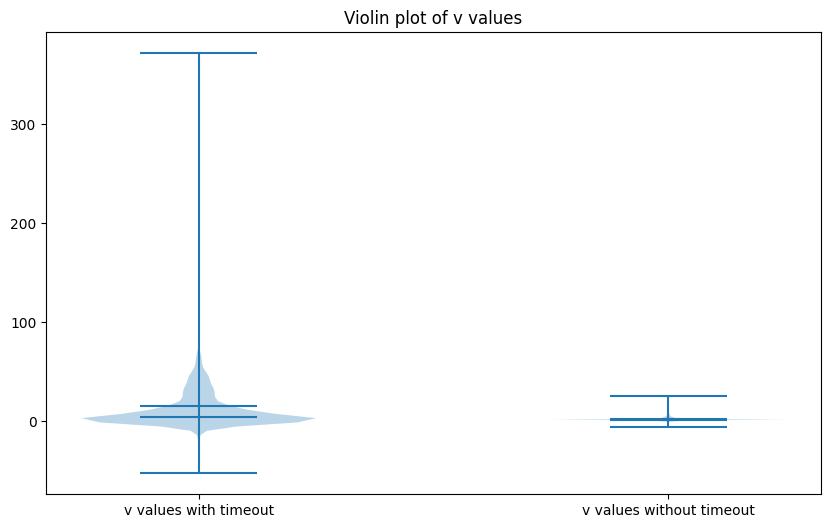

In [3]:
import wandb
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt


entity = "kazuyasakakibara"
project = "FoodBank2025"

api = wandb.Api()

w1_values_with_timeout = pd.DataFrame()
b1_values_with_timeout = pd.DataFrame()
w_final_values_with_timeout = pd.DataFrame()
v_values_with_timeout = pd.DataFrame()

w1_values_without_timeout = pd.DataFrame()
b1_values_without_timeout = pd.DataFrame()
w_final_values_without_timeout = pd.DataFrame()
v_values_without_timeout = pd.DataFrame()

def load_table(path):
    table_json_path = f"{wandb_run_dir}/files/{path}"
    with open(table_json_path, 'r') as f:
        data = json.load(f)
        table_df = pd.DataFrame(data=data["data"], columns=data["columns"])
    return table_df

runs = api.runs(f"{entity}/{project}", filters={"created_at": {"$gte": "2025-10-05T00:00:00Z"}})
runs = [run for run in runs if run.state == "finished"]
print(f"Runs after 2025-10-05: {len(runs)}")

for run in runs[:30]:
    run_id = run.id
    print(f"Processing run_id: {run_id}")
    wandb_run_dir = glob.glob(f"wandb/run-*_*-{run_id}")[0]
    run = api.run(f"{entity}/{project}/{run_id}")

    try:
        df = run.history(samples=500)[["test_timeout", "w1_table_embed_dim>n_agents", "b1_table", "w_final_table", "v_table"]]
    except KeyError:
        continue
    tables_with_timeout = df[df['test_timeout'].shift() == 1]
    tables_without_timeout = df[df['test_timeout'].shift() < 1]

    for index, row in tables_with_timeout.iterrows():
        w1_path = row["w1_table_embed_dim>n_agents"]["path"]
        b1_path = row["b1_table"]["path"]
        w_final_path = row["w_final_table"]["path"]
        v_path = row["v_table"]["path"]

        w1_df = load_table(w1_path)
        b1_df = load_table(b1_path)
        w_final_df = load_table(w_final_path)
        v_df = load_table(v_path)

        w1_values_with_timeout = pd.concat([w1_values_with_timeout, w1_df], ignore_index=True)
        b1_values_with_timeout = pd.concat([b1_values_with_timeout, b1_df], ignore_index=True)
        w_final_values_with_timeout = pd.concat([w_final_values_with_timeout, w_final_df], ignore_index=True)
        v_values_with_timeout = pd.concat([v_values_with_timeout, v_df], ignore_index=True)

    for index, row in tables_without_timeout.iterrows():
        w1_path = row["w1_table_embed_dim>n_agents"]["path"]
        b1_path = row["b1_table"]["path"]
        w_final_path = row["w_final_table"]["path"]
        v_path = row["v_table"]["path"]

        w1_df = load_table(w1_path)
        b1_df = load_table(b1_path)
        w_final_df = load_table(w_final_path)
        v_df = load_table(v_path)

        w1_values_without_timeout = pd.concat([w1_values_without_timeout, w1_df], ignore_index=True)
        b1_values_without_timeout = pd.concat([b1_values_without_timeout, b1_df], ignore_index=True)
        w_final_values_without_timeout = pd.concat([w_final_values_without_timeout, w_final_df], ignore_index=True)
        v_values_without_timeout = pd.concat([v_values_without_timeout, v_df], ignore_index=True)

print("With timeout:")
print("w1 shape:", w1_values_with_timeout.shape)
print("b1 shape:", b1_values_with_timeout.shape)
print("w_final shape:", w_final_values_with_timeout.shape)
print("v shape:", v_values_with_timeout.shape)
print("")
print("Without timeout:")
print("w1 shape:", w1_values_without_timeout.shape)
print("b1 shape:", b1_values_without_timeout.shape)
print("w_final shape:", w_final_values_without_timeout.shape)
print("v shape:", v_values_without_timeout.shape)

def plot_histogram(table_df_with_timeout, table_df_without_timeout, label=""):
    df1_values = table_df_with_timeout.values.flatten()
    df2_values = table_df_without_timeout.values.flatten()

    plt.hist(df1_values, bins=30, density=True, alpha=0.5, label=label + " values with timeout")
    plt.hist(df2_values, bins=30, density=True, alpha=0.5, label=label + " values without timeout")
    # plt.xlim(min(df1_values.min(), df2_values.min()), max(df1_values.max(), df2_values.max()))
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    data = [df1_values, df2_values]
    plt.violinplot(data, showmeans=True, showmedians=True)
    plt.xticks([1, 2], [label + " values with timeout", label + " values without timeout"])
    plt.title(f"Violin plot of {label} values")
    plt.show()

plot_histogram(w1_values_with_timeout, w1_values_without_timeout, label="w1")
plot_histogram(b1_values_with_timeout, b1_values_without_timeout, label="b1")
plot_histogram(w_final_values_with_timeout, w_final_values_without_timeout, label="w_final")
plot_histogram(v_values_with_timeout, v_values_without_timeout, label="v")




In [2]:
import wandb
import numpy as np

# トレーニング初期化
run = wandb.init(
    project="test", 
    config={"array_shape": (100, 50)})  # 例: 100x50配列

# INCREMENTALテーブル作成（stepとarray列のみ）
table = wandb.Table(
    columns=["step", "array_2d"],  # array_2d列にNumPyオブジェクト格納
    log_mode="INCREMENTAL"
)

for step in range(100):  # トレーニングループ例
    # 各ステップで大きな2次元配列生成（実際のRL計算に置き換え）
    large_array = np.random.rand(100, 50)  # 例: 100行x50列
    
    # テーブルに行追加（NumPy直接格納）
    table.add_data(step, large_array)  # 自動シリアライズ
    
    # インクリメンタルログ（効率的）
    run.log({"arrays_table": table}, step=step)

# 最終的にIMMUTABLEで全データ保存（分析用）
print("final")
final_table = wandb.Table(
    columns=table.columns, 
    data=table.data, 
    log_mode="IMMUTABLE"
)
run.log({"full_arrays": final_table})
print("Final table logged.")

run.finish()


KeyboardInterrupt: 

In [1]:
import wandb
import numpy as np

# 2. Run を開始
run = wandb.init(
    project="test",  # プロジェクト名
    config={"lr": 1e-3, "batch_size": 32},  # ハイパーパラメータなど
)

# INCREMENTALテーブル作成（stepとarray列のみ）
table = wandb.Table(
    columns=["step", "array_2d"],  # array_2d列にNumPyオブジェクト格納
    log_mode="INCREMENTAL"
)

for step in range(100):
    train_loss = 0.1 * (10 - step)  # ダミー
    acc = 0.8 + 0.02 * step         # ダミー
    # large_array = np.random.rand(100, 50)  # 例: 100行x50列

    table.add_data(step, 5)

    # 3. ログを送る（辞書形式）
    run.log(
        {
            "train/loss": train_loss,
            "train/acc": acc,
            "step": step,
            "table": table,
        },
        step=step,
    )
print("Logging complete.")

# 4. 終了
run.finish()


wandb: Currently logged in as: kazuyasakakibara to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Logging complete.


wandb: ERROR Control-C detected -- Run data was not synced


KeyboardInterrupt: 